<a href="https://colab.research.google.com/github/Chandradithya8/Tomato_leaf_disease_classification/blob/main/Tomato_leaf_disease_classification_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Mar 10 10:21:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.models import Model
from keras.layers import ReLU,Softmax,Lambda,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.losses import CategoricalCrossentropy
from glob import glob  
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image_size=[224,224]

train_image="/content/drive/MyDrive/Dataset/tomato/train"
test_imaage="/content/drive/MyDrive/Dataset/tomato/val"

In [ ]:
# include_top=False removes the fully connected layer
inception=InceptionV3(input_shape=image_size+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
## dont train with existing weights
for layers in inception.layers:
  layers.trainable=False

In [ ]:
## number of output features
output_no=glob('/content/drive/MyDrive/Dataset/tomato/train/*')

In [ ]:
## flatten layer connected to the output of inception
x=Flatten()(inception.output)
## output layer connected to the flatten layer
prediction=Dense(len(output_no),activation='softmax')(x)

In [ ]:
model=Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(loss=CategoricalCrossentropy(),optimizer='adam',metrics='accuracy')

In [ ]:
## data augumnetation
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/tomato/train',target_size=[224,224],batch_size=16)

test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/tomato/val',target_size=[224,224],batch_size=16)

Found 9521 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [ ]:
fit=model.fit(train_data,validation_data=test_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(test_data))

Epoch 1/10
596/596 [==============================] - 125s 210ms/step - loss: 2.4626 - accuracy: 0.8756 - val_loss: 5.6598 - val_accuracy: 0.8039
Epoch 2/10
596/596 [==============================] - 123s 207ms/step - loss: 2.3049 - accuracy: 0.8840 - val_loss: 4.6276 - val_accuracy: 0.8374
Epoch 3/10
596/596 [==============================] - 123s 207ms/step - loss: 2.2893 - accuracy: 0.8864 - val_loss: 5.4133 - val_accuracy: 0.8049
Epoch 4/10
596/596 [==============================] - 123s 206ms/step - loss: 2.1315 - accuracy: 0.8949 - val_loss: 6.5815 - val_accuracy: 0.7907
Epoch 5/10
596/596 [==============================] - 124s 208ms/step - loss: 2.5360 - accuracy: 0.8891 - val_loss: 6.4764 - val_accuracy: 0.7998
Epoch 6/10
596/596 [==============================] - 123s 206ms/step - loss: 2.0052 - accuracy: 0.9037 - val_loss: 5.1540 - val_accuracy: 0.8415
Epoch 7/10
596/596 [==============================] - 122s 205ms/step - loss: 2.3223 - accuracy: 0.9009 - val_loss: 5.9775 -

In [ ]:
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

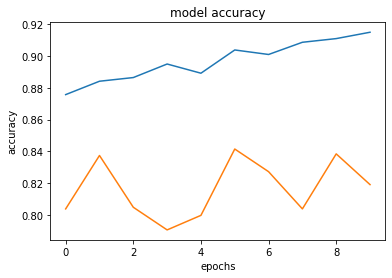

In [ ]:
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])

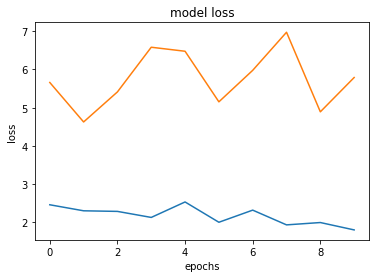

In [ ]:
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])

In [ ]:
model.save('tomato_leaf_disease_classification.h5')